<a href="https://colab.research.google.com/github/L-neis/exemplos-CN/blob/main/unidade5_MMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 4 - Aproximação de funções




Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: a **Interpolação** e o **Método dos Mínimos Quadrados**. A seguir, apresentamos alguns exemplos de resolução em *Python*. Vamos utilizar as bibliotecas [numpy](https://numpy.org/) e [scipy](https://scipy.github.io/devdocs/index.html).

**Motivação:**

Podemos estar interessados em extrair informações de um conjunto de dados de censos demográficos, que em geral ocorre a cada 10 anos. Como estimar a população em anos intermediários?

Podemos também aproximar funções $f(x)$ contínuas por uma combinação de polinômios ou funções trigonométricas, por exemplo.

Existem duas classes de métodos:


*   Método dos Mínimos Quadrados (MMQ): nosso objetivo é minimizar o resíduo entre os dados e uma função aproximadora.
*   Interpolação Polinomial: nesse caso exigimos que o polinômio aproximador "passe" pelos dados a serem aproximados.



# Método dos Mínimos Quadrados


**Problema Discreto:**

Objetivo: Minimizar resíduo (erro).

Para obter a melhor aproximação vamos minimizar a função:

$$  r({\bf a}) = \sum_{i=1}^m r_i({\bf a})^2,$$

sendo o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$.

Para ajustar os parâmetros da função $r({\bf a})$ vamos utilizar as bibliotecas *numpy* e *scipy*.

 *Assunto descrito em aula, para mais detalhes, veja material disponível no moodle.*

**Exemplo (1)**

Ajustar os dados abaixo usando uma reta (Regressão linear):

$$\begin{array}{c|ccccc}
x_i & 0 & 0.25 & 0.5 & 0.75 & 1\\
\hline
y_i & 1 & 1.2840 & 1.6487 & 2.1170 & 2.7183 \\
\end{array}$$

*Solução:*

A função aproximadora é dada por $g(x)=a_0 + a_1x$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def g(x, a):
  y = a[0] + a[1]*x
  return y

def resíduo(a, x, y):
  return g(x, a) - y

xi = np.array([0, 0,25, 0.5, 0.75, 1])
yi = np.array([1, 1.2840, 1.6487, 2.1170, 2.7183])

n = len(xi)
v1 = np.ones(n)

A = np.zeros((2, 2))
b = np.zeros(2)
A[0][0] = np.vdot(v1, v1)
A[0][1] = np.vdot(v1, xi)
A[1][0] = A[0][1]
A[1][1] = np.vdot(xi, xi)

b[0] = np.vdot(v1, yi)
b[1] = np.vdot(xi, yi)

a = np.linalg.solve(A, b)
print("a = ", a)

res = 0
for i in range(n):
  res += resíduo(a, xi[i], yi[i])**2
print("resíduo", res)

x = np.linspace(xi[0], xi[n-1], 100)
y = g(x, a)

plt.figure(1)
plt.plot(xi, yi, 'o', label = '$y_i$')
plt.plot(x, y, label = '$g(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Repita o exercício ajustando os dados com uma função quadrática: $g(x)=a_0+a_1x+a_2x^2$.

**Exemplo 2:**

Aproxime os dados da tabela usando $g(x)=a_0x +a_1\cos(x)$  como função aproximadora.

$$\begin{array}{c|cccccccc}
x_i & 0 & 1.5 & 3 & 4.5 &6\\
\hline
f(x_i) & 1 & 1.57 & 2 & 4.3 & 7 \\
\end{array}
$$

a =  [1.0034159  1.01327032]
resíduo 0.0003196239999689366


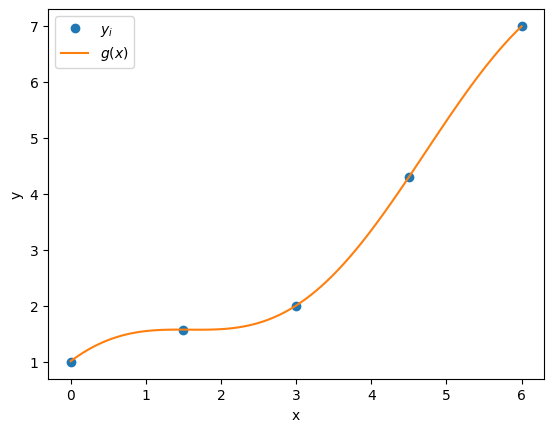

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def g(x, a):
  y = a[0]*x + a[1]*np.cos(x)
  return y

def resíduo(a, x, y):
  return g(x, a) - y

xi = np.array([0, 1.5, 3, 4.5, 6])
yi = np.array([1, 1.57, 2, 4.3, 7])

n = len(xi)
A = np.zeros((2, 2))
b = np.zeros(2)
A[0][0] = np.vdot(xi, xi)
A[0][1] = np.vdot(np.cos(xi), xi)
A[1][0] = A[0][1]
A[1][1] = np.vdot(np.cos(xi), np.cos(xi))

b[0] = np.vdot(xi, yi)
b[1] = np.vdot(np.cos(xi), yi)

a = np.linalg.solve(A, b)
print("a = ", a)

res = 0
for i in range(n):
  res += resíduo(a, xi[i], yi[i])**2
print("resíduo", res)

x = np.linspace(xi[0], xi[n-1], 100)
y = g(x, a)

plt.figure(1)
plt.plot(xi, yi, 'o', label = '$y_i$')
plt.plot(x, y, label = '$g(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Problema Contínuo**

No caso contínuo, o problema de ajuste de curvas consiste em: dada uma função $f(x)$ contínua em um intervalo $[a,b]$ e escolhidas as funções $g_0(x), g_1(x),\ldots, g_n(x)$ todas contínuas em $[a,b]$, queremos determinar $a_0,a_1,\ldots,a_n$ tais que a função $\displaystyle{g(x) = \sum_{k=0}^na_kg_k(x)}$ seja a melhor aproximação de $f(x)$ no intervalo $[a,b]$.

Determinar a *melhor aproximação*, como no caso discreto, significa minimizar a função resíduo dada por,

$$r({\bf a}) = \int_a^b[f(x) - \sum_{k=0}^na_kg_k(x)]^2dx.$$

No caso discreto, o resíduo era definido com uma soma finita, já o caso contínuo a definição do resíduo é feita por meio de uma integral em $[a,b]$. Para facilitar a notação, é comum utilizar a notação de produto escalar de duas funções.

1. Caso discreto $\displaystyle{<f,g> = \sum_{i=0}^m f(x_i)g(x_i)}$.
2. Caso contínuo $\displaystyle{<f,g> = \int_a^bf(x)g(x)dx}.$

Importante, lembrar que o produto escalar entre funções satisfaz as propriedades:
1. Linearidade: $\displaystyle{<ag_1+a_2g_2, f> = a_1<g_1,f>+a_2<g_2,f>}.$
2. Comutatividade: $\displaystyle{<f,g> = <g,f>}.$
3. Não negatividade: $\displaystyle{<g,g> \ge 0}$ e $\displaystyle{<g,g> = 0 \Leftrightarrow g \equiv 0}$.

**1. Exercício:** Verifique estas propriedades para os produtos escalares definidos para o caso discreto e para o caso contínuo.

Como fizemos para o caso discreto, queremos determinar os parâmetros $a_0,a_1,\ldots,a_n$ que minimizam o resíduo, ou seja, $\displaystyle{\dfrac{\partial r}{\partial a_j} = 0,}$ com $j=0,1,\ldots,n$. Assim, para cada $j$ temos uma equação da forma,
$$\int_a^b2[f(x) - \sum_{k=0}^na_kg_k(x)]g_j(x)dx = 0, \mbox{com } j = 0,\ldots, n.$$
Pelas propriedades de produto escalar, temos
$$\int_a^bf(x)g_j(x)dx -\sum_{k=0}^na_k\int_a^bg_k(x)g_j(x)dx = 0,$$
que implica em,
$$a_0\int_a^bg_0(x)g_j(x)dx + a_1\int_a^bg_1(x)g_j(x)dx + \ldots + a_n\int_a^bg_n(x)g_j(x)dx = \int_a^bf(x)g_j(x)dx.$$
Dessa forma obtemos o sistema normal,
$$\left(\begin{array}{cccc}
<g_0,g_0> & <g_1,g_0> & \ldots & <g_n,g_0> \\
<g_0,g_1> & <g_1,g_1> & \ldots & <g_n,g_1> \\
\vdots & & \ddots & \vdots \\
<g_0,g_n> & <g_1,g_n> & \ldots & <g_n,g_n>
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_n
\end{array}\right) = \left(\begin{array}{c}
<f,g_0>\\
<f,g_1>\\
\vdots\\
<f,g_n>
\end{array}\right),$$
sendo $\displaystyle{<g,f> = \int_a^bg(x)f(x)dx}$.








**Exemplo 1:**

Queremos subsituir a função $\displaystyle{f(x) = \sin\left(\frac{\pi}{4}x\right)}$ por um polinômio de grau 3, no intervalo $[0,1]$. Como a função $\displaystyle{\sin\left(\frac{\pi}{4}x\right)}$ é uma função ímpar, ou seja, $f(-x) = -f(x)$, vamos escolher um polinômio ímpar para o ajuste, $g(x) = a_0x+a_1x_3$. Isso significa, que $g_0(x) = x$ e $g_1(x) = x^3$. Assim, precisamos minimizar a função
$$r(a_0,a_1) = \int_0^1(\sin\frac{\pi}{4}x - a_0x - a_1x^3)^2dx.$$
Assim, o sistema normal é dado por,
$$\left(\begin{array}{cc}
\int_0^1x^2dx & \int_0^1x^4dx\\
\int_0^1x^4dx & \int_0^1x^6dx
\end{array}\right)
\left(\begin{array}{c}
a_0\\
\\
a_1\\
\end{array}\right) = \left(\begin{array}{c}
\int_0^1x\sin(\frac{\pi}{4}x) dx\\
\int_0^1x^3\sin(\frac{\pi}{4}x) dx
\end{array}\right),$$

Calculando as integrais (algumas por partes: $\int udv = uv -\int v du$) obtemos:

$$\begin{align}
\int_0^1x\sin(\frac{\pi}{4})dx & = -x\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{4}{\pi}\int_0^1\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{16}{\pi^2}\sin(\frac{\pi}{4})\\
& \approx 0.2460020203444062
\end{align}$$

$$\begin{align}
\int_0^1x^3\sin(\frac{\pi}{4})dx & = -x^3\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{12}{\pi}\int_0^1 x^2\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{12}{\pi}[\dfrac{4}{\pi}x^2\sin(\frac{\pi}{4}x)|_0^1 - \frac{8}{\pi}\int_0^1x\sin(\frac{\pi}{4}x)dx] \\
& \approx 0.14581796889606857
\end{align}$$

$$\int_0^1 x^2dx = \frac{x^3}{3}|_0^1 = \frac{1}{3}$$

$$\int_0^1 x^4dx = \frac{x^5}{5}|_0^1 = \frac{1}{5}$$

$$\int_0^1 x^6dx = \frac{x^7}{7}|_0^1 = \frac{1}{7}$$



Assim,

$$\left(\begin{array}{cc}
\dfrac{1}{3} & \dfrac{1}{5}\\
\dfrac{1}{5} & \dfrac{1}{7}
\end{array}\right) \left(\begin{array}{c}
a_0\\ \\
a_1
\end{array}\right) = \left(\begin{array}{c}
0.2460020203444062\\ \\
0.14581796889606857
\end{array}\right)$$

cuja solução é $a_0 = 0.7848162$ e $a_1 = -0.07801689$.
Portanto, a função aproximadora é $g(x) = 0.7848162x -0.07801689x^3.$